In [10]:

!pip install yfinance

Looking in indexes: https://artprod.dev.bloomberg.com/artifactory/api/pypi/bloomberg-pypi/simple, https://artprod.dev.bloomberg.com/artifactory/api/pypi/pypi-repos/simple
  Using cached https://artprod.dev.bloomberg.com/artifactory/api/pypi/pypi-repos/packages/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
  Using cached https://artprod.dev.bloomberg.com/artifactory/api/pypi/pypi-repos/packages/packages/57/f4/a69c20ee4f660081a7dedb1ac57f29be9378e04edfcb90c526b923d4bebc/beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached https://artprod.dev.bloomberg.com/artifactory/api/pypi/pypi-repos/packages/packages/a1/85/f3268eaaadc5d2ff52152654b3ae329827f30a0b86fd9b6990cd3df25660/frozendict-2.3.8-cp39-cp39-win_amd64.whl (35 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter 1.0.0 requires qtconsole, which is not installed.


In [1]:
import numpy as np
import pandas as pd
import scipy
import pandas_datareader as web
import seaborn as sns
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Statistical calculation
from scipy.stats import norm


byddata = pd.read_csv('BYD.csv')
cocodata = pd.read_csv('COCO.csv')
elfdata = pd.read_csv('ELF.csv')
kodata = pd.read_csv('KO.csv')
sdata = pd.read_csv('S.csv')
spxdata = pd.read_csv('SPX.csv')

byddata.rename(columns={'Close': 'bydprice'}, inplace=True)
cocodata.rename(columns={'Close': 'cocoprice'}, inplace=True)
elfdata.rename(columns={'Close': 'elfprice'}, inplace=True)
kodata.rename(columns={'Close': 'koprice'}, inplace=True)
sdata.rename(columns={'Close': 'sprice'}, inplace=True)
spxdata.rename(columns={'Close': 'spxprice'}, inplace=True)

byd = byddata['bydprice']
coco = cocodata['cocoprice']
elf = elfdata['elfprice']
ko = kodata['koprice']
s = sdata['sprice']
spx = spxdata['spxprice']

Text(0, 0.5, 'price ($)')

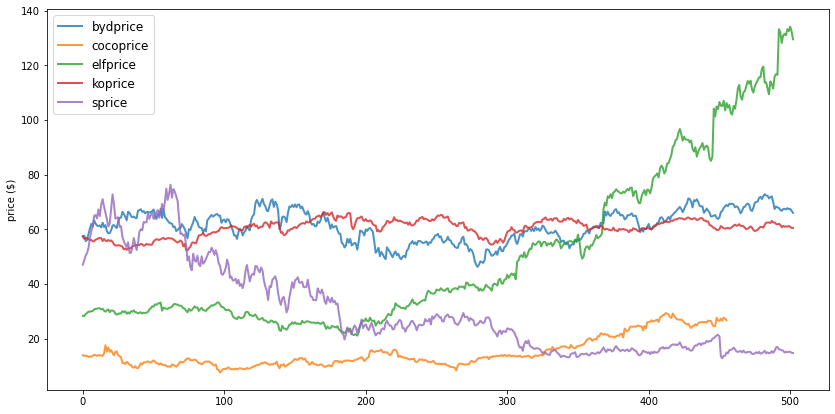

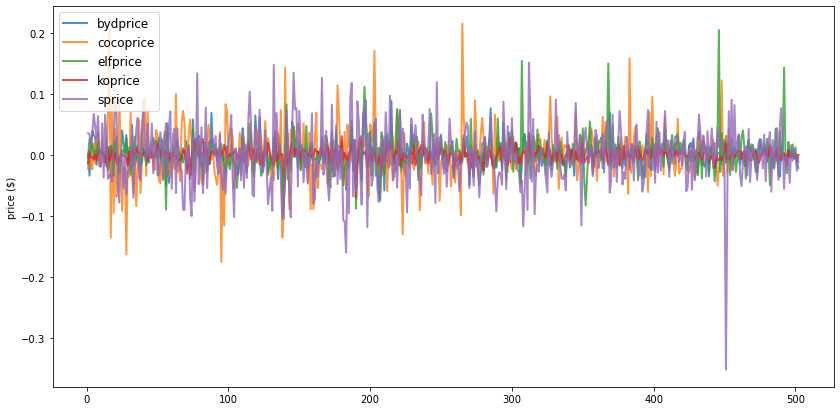

In [2]:
newdataframebeta = pd.concat([byd,coco,elf,ko,s,spx], axis=1)
newdataframe = pd.concat([byd,coco,elf,ko,s], axis=1)
returns = newdataframe.pct_change().dropna()

#print(returns)
a = returns.cov()
#betas = a["sprice"] / a.loc["sprice", "sprice"]


#Plot 
plt.figure(figsize=(14, 7))
for i in newdataframe.columns.values:
    plt.plot(newdataframe.index, newdataframe[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')



#Plot daily %change
plt.figure(figsize=(14, 7))
for i in returns.columns.values:
    plt.plot(returns.index, returns[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.55
Annualized Volatility: 0.29


--Allocation at max Sharpe ratio--

            bydprice  cocoprice  elfprice  koprice  sprice
allocation      1.76      20.64     51.38    21.54    4.69
----------------------------------------------------------------------------------------------------


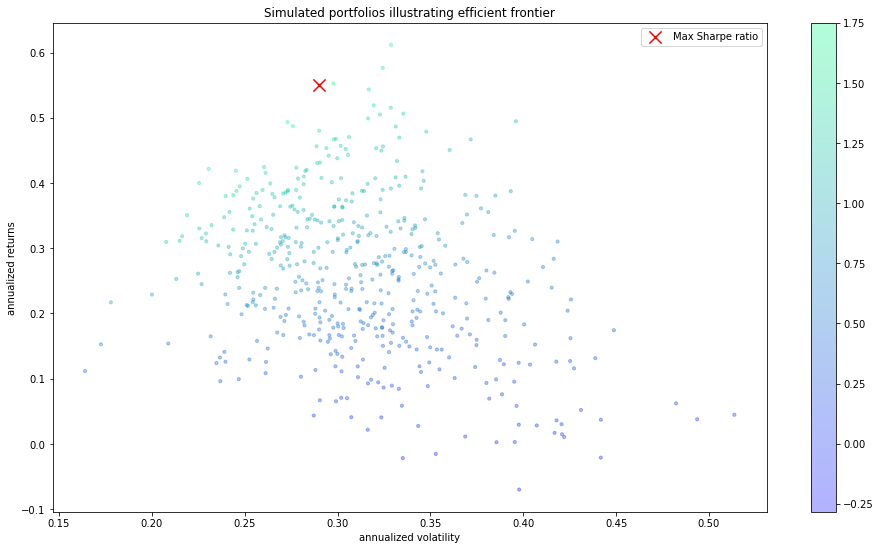

In [4]:
# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    # Given the avg returns, weights of equities calc. the portfolio return
    returns = np.sum(mean_returns*weights ) *252
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns




def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((5, num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our 4 equities
        weights = np.random.random(5)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array



returns = newdataframe.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 500
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.0427



def display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=newdataframe.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))

    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)

    plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate)
